Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  

## Strojno učenje 1 2021/2022
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Neparametarske metode

*Verzija: 1.0 
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. prosinca 2021. u 23:59h**  

------------------------------

### Upute

Ova laboratorijska vježba sastoji se od četiri zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);
    
def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, 
             test_size=0.3, k_range=(1, 20), n_trials=40):
    
    train_errors = []
    test_errors = []
    ks = list(range(k_range[0], k_range[1] + 1))

    for i in range(0, n_trials):
        X, y = make_classification(n_instances, n_features, n_classes=n_classes, 
                                   n_informative=n_informative, n_redundant=0, n_clusters_per_class=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        train = []
        test = []
        for k in ks:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            train.append(1 - knn.score(X_train, y_train))
            test.append(1 - knn.score(X_test, y_test))
        train_errors.append(train)
        test_errors.append(test)
        
    train_errors = np.mean(np.array(train_errors), axis=0)
    test_errors = np.mean(np.array(test_errors), axis=0)
    best_k = ks[np.argmin(test_errors)]
    
    return ks, best_k, train_errors, test_errors

### 1. Algoritam k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, radi efikasnosti).

#### (a)

Implementirajte klasu `KNN`, koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [3]:
from numpy.linalg import norm

def most_frequent(l):
    return max(set(l), key = l.count)

class KNN:
    def __init__(self, n_neighbors=3):
        
        self.n_neighbors = n_neighbors
        self.data = []
        # Vaš kôd ovdje...
                
    def fit(self, X_train, y_train):
        
        for i in range(len(X_train)):
            
            self.data.append([X_train[i],y_train[i]])

        # Vaš kôd ovdje...
        
    def predict(self, X_test):
        
        pred = np.zeros(len(X_test),dtype=np.uint8)
        
        for i in range(len(X_test)):
            distance_pred = []
            #print(norm(X_test[i]-self.data[i][0]),self.data[i][1])
            for j in range(len(self.data)):
                
                #print(X_test[i])
                #print(self.data[j][0])
                #print(norm(X_test[i]-self.data[j][0]))
                distance_pred.append([norm(X_test[i]-self.data[j][0]),self.data[j][1]])
            #print(distance_pred)
                                    
            distance_pred = sorted(distance_pred, key = lambda x: x[0])[0:self.n_neighbors]
            #print(distance_pred)
            classes = [x[1] for x in distance_pred]
            #print(classes)
        
            pred[i] = most_frequent(classes)

        return pred                
                                    
            
        # Vaš kôd ovdje...

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s onom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da vam se predikcije razlikuju. Usporedite modele na danom (umjetnom) skupu podataka (prisjetite se kako se uspoređuju polja; [`numpy.all`](https://numpy.org/doc/stable/reference/generated/numpy.all.html)).

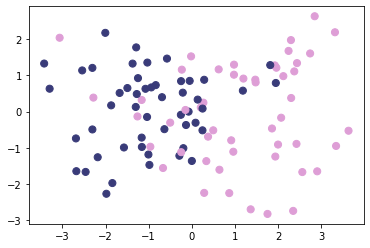

In [4]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, 
                                   n_redundant=0, n_clusters_per_class=2,
                                   random_state=69)
plot_2d_clf_problem(X_art, y_art)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNN()
model.fit(X_art,y_art)
h_moje = model.predict(X_art)
print(f"Moje klasifikacije : {h_moje}")

print()

model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 3).fit(X_art, y_art)
h_implementirano = model.predict(X_art)
print(f"Klasifikacije razreda: {h_implementirano}")

print()

is_equal = np.all([True if h_moje[i]==h_implementirano[i] else False for i in range(len(h_moje))])
print(f"Jesu li sve klasifikacije jednake: {is_equal}")



Moje klasifikacije : [1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0]

Klasifikacije razreda: [1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0]

Jesu li sve klasifikacije jednake: True


### 2. Utjecaj hiperparametra *k*

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$. 

Kako bismo dobili pouzdanije rezultate, potrebno je neke od eksperimenata ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Koristite funkciju: `knn_eval` koja trenira i ispituje model k-najbližih susjeda na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka i dijeleći ga na skup za učenje i skup za ispitivanje. Udio skupa za ispitivanje definiran je parametrom `test_size`. Povratna vrijednost funkcije jest četvorka `(ks, best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$, dok `ks` upravo pohranjuje sve razmatrane vrijednosti hiperparametra $k$.

#### (a)

Na podatcima iz zadatka 1, pomoću funkcije `plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Ponovite ovo za $k\in[1, 5, 20, 100]$. 

**NB:** Implementacija algoritma `KNeighborsClassifier` iz paketa `scikit-learn` vjerojatno će raditi brže od Vaše implementacije, pa u preostalim eksperimentima koristite nju.

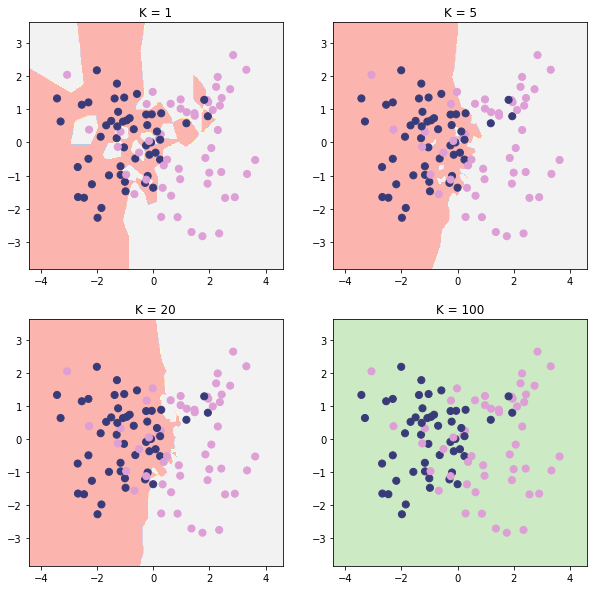

In [6]:
from sklearn.model_selection import train_test_split

figure(figsize(10, 10))

k_s = [1,5,20,100]

for i in range(len(k_s)):

    model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = k_s[i]).fit(X_art, y_art)
    subplot(2,2,i+1)
    title( "K = " + str(k_s[i]) )
    plot_2d_clf_problem(X_art,y_art,model.predict)   

**Q:** Kako $k$ utječe na izgled granice između klasa?  
**Q:** Kako se algoritam ponaša u ekstremnim situacijama: $k=1$ i $k=100$?

#### (b)

Pomoću funkcije `knn_eval`, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k\in\{1,\dots,20\}$, za $N=\{100, 250, 750\}$ primjera. Načinite 3 zasebna grafikona. Za svaki ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona; vidi [`plt.title`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.title.html)).

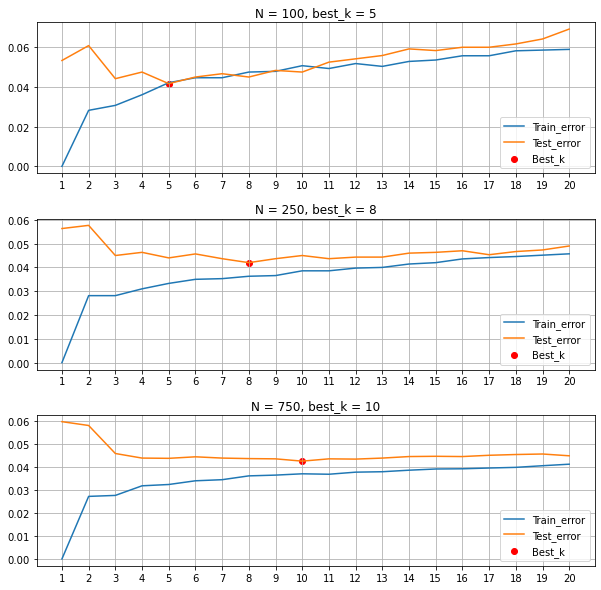

In [7]:
# Vaš kôd ovdje...
subplots_adjust(hspace = 0.3,wspace=0.3)

N_s = [100,250,750]
k_range = (1,20)

for i in range(len(N_s)):
    
    subplot(3,1,i+1)
    
    ks,best_k,train_errors,test_errors = knn_eval(n_instances = N_s[i])
    
    #print(ks,best_k,train_errors,test_errors,sep="\n")
    plt.plot([x for x in range(k_range[0],k_range[1]+1)],train_errors)
    plt.plot([x for x in range(k_range[0],k_range[1]+1)],test_errors)
    plt.scatter(best_k,test_errors[best_k-1],color="red")
    plt.xticks([x for x in range(k_range[0],k_range[1]+1)])
    plt.grid(True)
    legend(["Train_error", "Test_error", "Best_k"])
    title("N = " + str(N_s[i])+", best_k = " + str(best_k))
    

**Q:** Kako se mijenja optimalna vrijednost hiperparametra $k$ s obzirom na broj primjera $N$? Zašto?  
**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto?  
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

### 3. Nebitne značajke

Kako bismo provjerili u kojoj je mjeri algoritam k-najbližih susjeda osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval`, koja samo preuzime ove parametre, ali nam omogućuje pouzdanije procjene.

Koristite funkciju `mlutils.knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

N_informative = 10

Optimalni k: 7
Optimalna pogreska skupa za ucenje: 0.09
Optimalna pogreska skupa za ispitivanje: 0.14

N_informative = 5

Optimalni k: 11
Optimalna pogreska skupa za ucenje: 0.16
Optimalna pogreska skupa za ispitivanje: 0.21



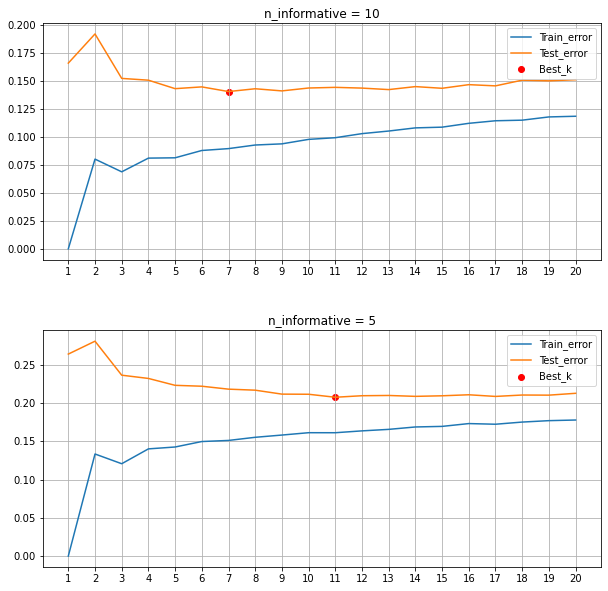

In [8]:
# Vaš kôd ovdje...

subplots_adjust(hspace = 0.3,wspace=0.3)
k_range = (1,20)

subplot(2,1,1)
ks,best_k,train_errors,test_errors = knn_eval(n_instances = 1000, n_informative = 10, n_features = 10, n_classes = 5)
plt.plot([x for x in range(k_range[0],k_range[1]+1)],train_errors)
plt.plot([x for x in range(k_range[0],k_range[1]+1)],test_errors)
plt.scatter(best_k,test_errors[best_k-1],color="red")
plt.xticks([x for x in range(k_range[0],k_range[1]+1)])
plt.grid(True)
legend(["Train_error", "Test_error", "Best_k"])
title("n_informative = 10")
print(f"N_informative = 10\n")
print(f"Optimalni k: {best_k}\nOptimalna pogreska skupa za ucenje: {round(train_errors[best_k-1],2)}\nOptimalna pogreska skupa za ispitivanje: {round(test_errors[best_k-1],2)}\n")

subplot(2,1,2)
ks,best_k,train_errors,test_errors = knn_eval(n_instances = 1000, n_informative = 5, n_features = 10, n_classes = 5)
plt.plot([x for x in range(k_range[0],k_range[1]+1)],train_errors)
plt.plot([x for x in range(k_range[0],k_range[1]+1)],test_errors)
plt.scatter(best_k,test_errors[best_k-1],color="red")
plt.xticks([x for x in range(k_range[0],k_range[1]+1)])
plt.grid(True)
legend(["Train_error", "Test_error", "Best_k"])
title("n_informative = 5")
print(f"N_informative = 5\n")
print(f"Optimalni k: {best_k}\nOptimalna pogreska skupa za ucenje: {round(train_errors[best_k-1],2)}\nOptimalna pogreska skupa za ispitivanje: {round(test_errors[best_k-1],2)}\n")

**Q:** Je li algoritam k-najbližih susjeda osjetljiv na nebitne značajke? Zašto?  
**Q:** Je li ovaj problem izražen i kod ostalih modela koje smo dosad radili (npr. logistička regresija)?  
**Q:** Kako bi se model k-najbližih susjeda ponašao na skupu podataka sa značajkama različitih skala? Detaljno pojasnite.

### 4. "Prokletstvo dimenzionalnosti"

"Prokletstvo dimenzionalnosti" zbirni je naziv za niz fenomena povezanih s visokodimenzijskim prostorima. Ti fenomeni, koji se uglavnom protive našoj intuiciji, u većini slučajeva dovode do toga da se s porastom broja dimenzija (značajki) smanjenje točnost modela.

Općenito, povećanje dimenzija dovodi do toga da sve točke u ulaznome prostoru postaju (u smislu euklidske udaljenosti) sve udaljenije jedne od drugih te se, posljedično, gube razlike u udaljenostima između točaka. Eksperimentalno ćemo provjeriti da je to doista slučaj. Proučite funkciju [`metrics.pairwise_distances`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Generirajte 100 slučajnih vektora u različitim dimenzijama $n\in[1,2,\ldots,50]$ dimenzija te izračunajte *prosječnu* euklidsku udaljenost između svih parova tih vektora. Za generiranje slučajnih vektora koristite funkciju [`numpy.random.random`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html). Na istom grafu skicirajte i krivulju za prosječne kosinusne udaljenosti (parametar `metric`).

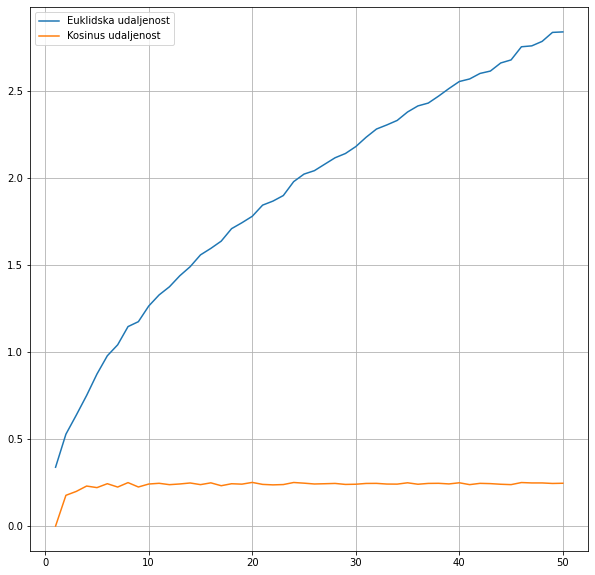

In [9]:
from sklearn.metrics.pairwise import pairwise_distances

# Vaš kôd ovdje...
N = 100

euclid_dist = []
cos_dist = []

for n in range(1,51):
    
    random_vectors = numpy.random.rand(100,n)
    euclid_dist.append(mean(pairwise_distances(random_vectors)))
    cos_dist.append(mean(pairwise_distances(random_vectors,metric='cosine')))
    
plt.plot([n for n in range(1,51)], euclid_dist)
plt.plot([n for n in range(1,51)], cos_dist)
plt.grid(True)
legend(["Euklidska udaljenost", "Kosinus udaljenost"])

**Q:** Pokušajte objasniti razlike u rezultatima. Koju biste od ovih dviju mjera koristili za klasifikaciju visokodimenzijskih podataka?  
**Q:** Zašto je ovaj problem osobito izražen kod algoritma k-najbližih susjeda?